##### Jupyter Notebook, Step 1 - Benchmarking
- build pipeline to perform a naive fit for each of the base model classes:
	- logistic regression
	- decision tree
	- k nearest neighbors
	- support vector classifier
- in order to do this, you will need to set a high `C` value in order to perform 
minimal regularization, in the case of logistic regression and support vector classifier.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
from tqdm import tqdm
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,precision_recall_curve,confusion_matrix 
from sklearn.metrics import (precision_score,accuracy_score,roc_auc_score,roc_curve, 
                             precision_recall_curve,recall_score,make_scorer,auc) 
                              

%matplotlib inline

ModuleNotFoundError: No module named 'tqdm'

In [2]:
# I was not able to retrive more than 3000 rows of data at a time.
# So I retrieved 5 samples of 3000 rows. I will use 3 subsets of data
# that are 4000 rows each.

In [3]:
# Read in the pickled Madelon data, retrieved earlier from database.
# See notebook 'P3_DB_data_retrieval.ipynb'

In [4]:
dataset_1_df   = pd.read_pickle('../MadelonDBData/df3000_1.p')
dataset_2_df   = pd.read_pickle('../MadelonDBData/df3000_2.p')
dataset_3_df   = pd.read_pickle('../MadelonDBData/df3000_3.p')
dataset_4_df   = pd.read_pickle('../MadelonDBData/df3000_4.p')
dataset_5_df   = pd.read_pickle('../MadelonDBData/df3000_5.p')

In [5]:
dataset_1_df.shape, dataset_2_df.shape,dataset_3_df.shape, dataset_4_df.shape, dataset_5_df.shape

((3000, 1002), (3000, 1002), (3000, 1002), (3000, 1002), (3000, 1002))

In [6]:
dataset_1_df.head()

_id  feat_000  feat_001  feat_002  feat_003  feat_004  feat_005  \
0  107971  0.379930  1.263945 -0.788751  0.242238  0.909713 -0.238677   
1  158605 -1.086492 -0.098804 -0.108155  0.091832 -1.041884 -1.286358   
2    7693 -0.059343  0.281730  0.396618  1.080609  0.547924 -0.671473   
3  136191 -0.922666 -0.571571 -0.325827  0.683418  1.150821  0.672791   
4   33087  2.130117 -1.457055  0.112199 -1.739049  1.033628  1.268523   

   feat_006  feat_007  feat_008   ...    feat_991  feat_992  feat_993  \
0 -1.064835  1.598606  0.275761   ...   -0.487347 -0.446448  0.434216   
1 -0.263369 -2.908327 -2.062492   ...   -0.144838  0.529429 -0.831674   
2 -0.157873 -0.333325  0.805554   ...    1.401094 -1.204238 -1.470250   
3 -0.402799  0.912123 -0.196423   ...   -0.775974  0.767312  1.093832   
4  0.706005 -0.183416  0.561083   ...    1.189077  1.726686 -0.466693   

   feat_994  feat_995  feat_996  feat_997  feat_998  feat_999  target  
0  0.333720 -0.211308 -0.499448  0.523186  0.064643  0.386545       0  
1  0.678643  0.662404 -0.988360  1.756702  0.942543 -1.854845       1  
2 -0.579397 -0.532083  0.812578 -1.271424 -2.091807  0.435828       1  
3  2.425454 -0.501526 -1.767517 -0.918765 -1.387155 -0.236656       1  
4  1.057558  1.002655 -0.256453  1.579935 -0.755556 -1.961971       0  

[5 rows x 1002 columns]

In [7]:
dataset_1_df.isnull().sum().sum(), dataset_2_df.isnull().sum().sum(),dataset_3_df.isnull().sum().sum()

(0, 0, 0)

In [8]:
dataset_4_df.isnull().sum().sum(), dataset_5_df.isnull().sum().sum()

(0, 0)

In [9]:
# We see the data has no null values.

In [10]:
# I have 15000 rows of data. I will separate 1500 rows for validation and 1500 for rows
# for test data. The remaining 12000 will be divided into 3 training subsets.

In [11]:
X_train_df = dataset_1_df.append(dataset_2_df).append(dataset_3_df).append(dataset_4_df)

In [12]:
X_validate_df = pd.DataFrame(dataset_4_df.iloc[:1500, :])

In [13]:
X_test_df = pd.DataFrame(dataset_4_df.iloc[1500:, :])

In [14]:
X_train_df.shape, X_validate_df.shape, X_test_df.shape

((12000, 1002), (1500, 1002), (1500, 1002))

In [15]:
# Split X_train_data into 3 subsets.
X_train_1_df = pd.DataFrame(X_train_df.iloc[:4000, :])
X_train_2_df = pd.DataFrame(X_train_df.iloc[4000:8000, :])
X_train_3_df = pd.DataFrame(X_train_df.iloc[8000:, :])

In [16]:
X_train_1_df.shape, X_train_2_df.shape, X_train_3_df.shape

((4000, 1002), (4000, 1002), (4000, 1002))

In [17]:
#Set y as'target' for train, validate and test data. 

y_train_1 = X_train_1_df['target'].values 
y_train_2 = X_train_2_df['target'].values
y_train_3 = X_train_3_df['target'].values

y_validate = X_validate_df['target'].values
y_test     = X_test_df['target'].values

In [18]:
y_train_1.shape, y_train_2.shape, y_train_3.shape, y_validate.shape, y_test.shape

((4000,), (4000,), (4000,), (1500,), (1500,))

In [19]:
# I will drop column '_id' and 'target' from the dataset. 

X_train_1_df.drop(['_id','target'], axis=1, inplace=True)
X_train_2_df.drop(['_id','target'], axis=1, inplace=True)
X_train_3_df.drop(['_id','target'], axis=1, inplace=True)

X_validate_df.drop(['_id','target'], axis=1, inplace=True)
X_test_df.drop(['_id','target'], axis=1, inplace=True)

In [20]:
X_train_1_df.shape, X_train_2_df.shape, X_train_3_df.shape, X_validate_df.shape, X_test_df.shape

((4000, 1000), (4000, 1000), (4000, 1000), (1500, 1000), (1500, 1000))

In [21]:
del dataset_1_df; del dataset_2_df; del dataset_3_df; del dataset_4_df; del dataset_5_df;

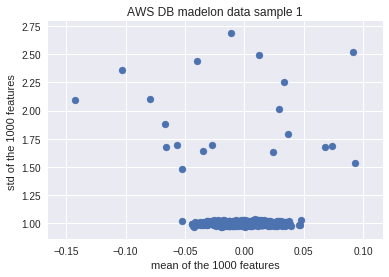

In [22]:
plt.scatter(X_train_1_df.mean(), X_train_1_df.std())
plt.title('AWS DB madelon data sample 1')
plt.xlabel('mean of the 1000 features')
plt.ylabel('std of the 1000 features ')

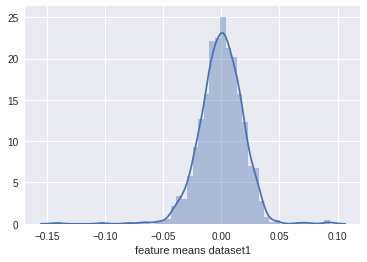

In [23]:
sns.distplot(X_train_1_df.mean(), axlabel='feature means dataset1')

# The means of the features in dataset 1 seems to be pretty normally distributed.

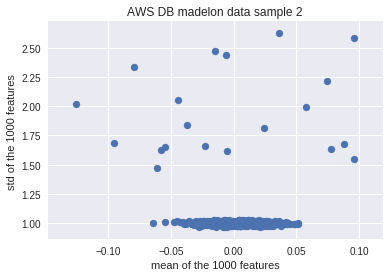

In [24]:
plt.scatter(X_train_2_df.mean(), X_train_2_df.std())
plt.title('AWS DB madelon data sample 2')
plt.xlabel('mean of the 1000 features')
plt.ylabel('std of the 1000 features ')

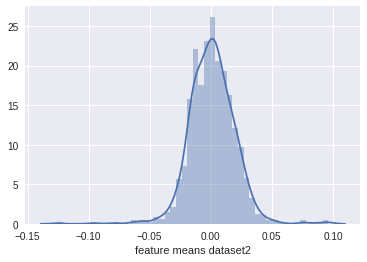

In [25]:
sns.distplot(X_train_2_df.mean(), axlabel='feature means dataset2')

# The means of the features in dataset 2 seems to be pretty normally distributed.

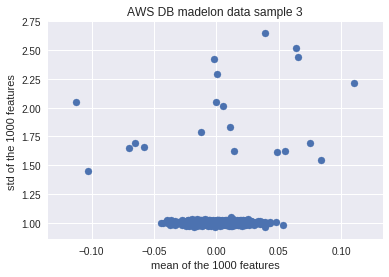

In [26]:
plt.scatter(X_train_3_df.mean(), X_train_3_df.std())
plt.title('AWS DB madelon data sample 3')
plt.xlabel('mean of the 1000 features')
plt.ylabel('std of the 1000 features ')

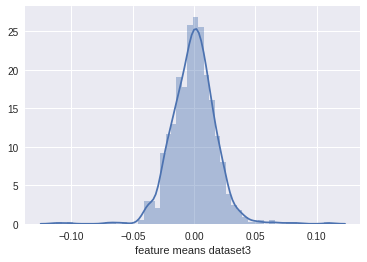

In [27]:
sns.distplot(X_train_3_df.mean(), axlabel='feature means dataset3')

# The means of the features in dataset 3 seems to be pretty normally distributed.

In [28]:
# Pickle the DataFrames for all the X and y data.
# So I can use in other notebooks.

# Write train data.
X_train_1_df.to_pickle('../dataNB1_DB/X_train_1_df.p')
X_train_2_df.to_pickle('../dataNB1_DB/X_train_2_df.p')
X_train_3_df.to_pickle('../dataNB1_DB/X_train_3_df.p')

pd.DataFrame(y_train_1).to_pickle('../dataNB1_DB/y_train_1.p')
pd.DataFrame(y_train_2).to_pickle('../dataNB1_DB/y_train_2.p')
pd.DataFrame(y_train_3).to_pickle('../dataNB1_DB/y_train_3.p')

# Write validate data.
X_validate_df.to_pickle('../dataNB1_DB/X_validate_df.p')
pd.DataFrame(y_validate).to_pickle('../dataNB1_DB/y_validate.p')

# Write test data.
X_test_df.to_pickle('../dataNB1_DB/X_test_df.p')
pd.DataFrame(y_test).to_pickle('../dataNB1_DB/y_test.p')


In [ ]:
#*************************** READ PICKLED DATA ***************************************

In [ ]:
# I will read in pickled X train/test and y train/test data. 
# I can remove before submitting.

# X train data.
X_train_1_df = pd.read_pickle('../dataNB1_DB/X_train_1_df.p')
X_train_2_df = pd.read_pickle('../dataNB1_DB/X_train_2_df.p')
X_train_3_df = pd.read_pickle('../dataNB1_DB/X_train_3_df.p')

# X validate data.
X_validate_df = pd.read_pickle('../dataNB1_DB/X_validate_df.p')

# X test data.
X_test_df = pd.read_pickle('../dataNB1_DB/X_test_df.p')


# y train data.
y_train_1_df = pd.read_pickle('../dataNB1_DB/y_train_1.p')
y_train_2_df = pd.read_pickle('../dataNB1_DB/y_train_2.p')
y_train_3_df = pd.read_pickle('../dataNB1_DB/y_train_3.p')

# y needs to be an array of values.
y_train_1 = np.array([val[0] for val in y_train_1_df.values])
y_train_2 = np.array([val[0] for val in y_train_2_df.values])
y_train_3 = np.array([val[0] for val in y_train_3_df.values])

# y validate data.
y_validate_df = pd.read_pickle('../dataNB1_DB/y_validate.p')
y_validate = np.array([val[0] for val in y_validate_df.values])

# y test data.
y_test_df = pd.read_pickle('../dataNB1_DB/y_test.p')
y_test = np.array([val[0] for val in y_test_df.values])


In [29]:
# Make a list of our X and y train data subsets.

In [30]:
X_train_lst = [X_train_1_df, X_train_2_df, X_train_2_df]
y_train_lst = [y_train_1, y_train_2, y_train_3]

In [31]:
# Log output
def log_output(dataset_name, model_name, raw_output, sc_output):
    entry = {                
                'dataset'           :  dataset_name,
                'model'             :  model_name,
                'raw_tr_acc_score'  :  raw_output['train_score'],
                'raw_tst_acc_score' :  raw_output['test_score'],
                'sc_tr_acc_score'   :  sc_output['train_score'],
                'sc_tst_acc_score'  :  sc_output['test_score'],
                'raw_recall'        :  raw_output['recall'],
                'raw_precision'     :  raw_output['precision'],
                'sc_recall'         :  sc_output['recall'],
                'sc_precision'      :  sc_output['precision']
            }
    return(entry)

In [32]:
def fit_and_score_pipeline(pipe, Xtrain, Xtest, ytrain, ytest, target_names):
    
    # Fit and score Logistic Regression raw pipeline.
    pipe.fit(Xtrain, ytrain) 
    
    # Mean accuracy score is returned.
    train_score = pipe.score(Xtrain,ytrain)
    test_score = pipe.score(Xtest,ytest)  
    y_pred = pipe.predict(Xtest)

    # Calculate precision and recall.   
    recall = recall_score(ytest, y_pred)
    precision = precision_score(ytest, y_pred)
  
    output = {'train_score':train_score, 
              'test_score':test_score, 
              'recall':recall, 
              'precision':precision}
    
    #classification reports. 
    class_report_str = classification_report(ytest, y_pred, target_names=target_names)
    
    #confusion matrix.
    conf_matrix_raw = confusion_matrix(ytest, y_pred)
  
    return(output, class_report_str, conf_matrix_raw)


In [33]:
# Save mean accuracy scores, classification reports and confusion matrix.
model_results = []
confusion_mtx = {}
classification_rep = {}
target_names=['class 0', 'class 1']

In [34]:
# Benchmark. Use high C=1e10 for logistic regression and support
# vector classifier, so there is no regularization. 
# KNeighbors default is k=5.

# Fit naive models to benchmark the 3 data subsets.
for tst_set in tqdm(range(3)):

    # Split the data.
    Xtrain, Xtest, ytrain, ytest = train_test_split(X_train_lst[tst_set], 
                                                    y_train_lst[tst_set], 
                                                    test_size=0.33)
                              
    # Logistic Regression pipes.
    LR_naive_raw_pipe  =  make_pipeline(LogisticRegression(C=1e10, random_state=42))
    LR_naive_scaled_pipe = make_pipeline(StandardScaler(), 
                                         LogisticRegression(C=1e10, random_state=42))
    
    # fit and score pipeline with raw and scaled data. Results are stored in a dict.
    raw_output, cl_report_str, conf_mtx = fit_and_score_pipeline(LR_naive_raw_pipe, 
                                                                 Xtrain, Xtest,     
                                                                 ytrain, ytest,
                                                                 target_names=target_names)

    # Save classification report and confusion matrix, raw data.
    key = 'LR_raw_report'+str(tst_set+1)
    classification_rep[key] = cl_report_str
    key = 'LR_raw_conf_mtx'+str(tst_set+1)
    confusion_mtx[key] = conf_mtx
                                           
    sc_output, cl_report_str, conf_mtx = fit_and_score_pipeline(LR_naive_scaled_pipe, 
                                                                Xtrain, Xtest, 
                                                                ytrain, ytest,
                                                                target_names=target_names)
       
    # Save classification report and confusion matrix, scaled data.
    key = 'LR_scaled_report'+str(tst_set+1)
    classification_rep[] = cl_report_str[key]
    key = 'LR_scaled_conf_mtx'+str(tst_set+1)
    confusion_mtx[] = conf_mtx[key]
    
    # Output results
    entry    = log_output(dataset_name = 'Data_Set_'+str(tst_set+1), 
                          model_name   = 'LogisticRegression', 
                          raw_output   = raw_output,
                          sc_output    = sc_output)

    model_results.append(entry)
    
    #*******************************************************************************
    
    # SVC pipes.
    SVC_naive_raw_pipe =  make_pipeline(SVC(C=1e10, random_state=42))                                  
    SVC_naive_scaled_pipe = make_pipeline(StandardScaler(), 
                                          SVC(C=1e10, random_state=42))                                  

        
    # fit and score pipeline with raw and scaled data. Results are stored in a dict.
    raw_output, cl_report_str, conf_mtx = fit_and_score_pipeline(SVC_naive_raw_pipe, 
                                                                 Xtrain, Xtest,     
                                                                 ytrain, ytest,
                                                                 target_names=target_names)

    # Save classification report and confusion matrix, raw data.
    key = 'SVC_raw_report'+str(tst_set+1)
    classification_rep[] = cl_report_str
    key = 'SVC_raw_conf_mtx'+str(tst_set+1)
    confusion_mtx[key] = conf_mtx
                                           
    sc_output, cl_report_str, conf_mtx = fit_and_score_pipeline(SVC_naive_scaled_pipe, 
                                                                Xtrain, Xtest, 
                                                                ytrain, ytest,
                                                                target_names=target_names)
       
    # Save classification report and confusion matrix, scaled data.
    key = 'SVC_scaled_report'+str(tst_set+1)
    classification_rep[key] = cl_report_str
    key = 'SVC_scaled_conf_mtx'+str(tst_set+1)
    confusion_mtx[key] = conf_mtx       
    
    # Output results
    entry = log_output(dataset_name = 'Data_Set_'+str(tst_set+1), 
                       model_name   = 'SVC', 
                       raw_output   = raw_output,
                       sc_output    = sc_output)

    model_results.append(entry)    

    #*******************************************************************************

    # Decision Tree pipes.
    DT_naive_raw_pipe  =  make_pipeline(DecisionTreeClassifier(random_state=42))
    DT_naive_scaled_pipe = make_pipeline(StandardScaler(), 
                                         DecisionTreeClassifier(random_state=42))

    # fit and score pipeline with raw and scaled data. Results are stored in a dict.
    raw_output, cl_report_str, conf_mtx = fit_and_score_pipeline(DT_naive_raw_pipe, 
                                                                 Xtrain, Xtest,     
                                                                 ytrain, ytest,
                                                                 target_names=target_names)

    # Save classification report and confusion matrix, raw data.
    key = 'DT_raw_report'+str(tst_set+1)
    classification_rep[key] = cl_report_str
    key = 'DT_raw_conf_mtx'+str(tst_set+1)
    confusion_mtx[key] = conf_mtx
                                           
    sc_output, cl_report_str, conf_mtx = fit_and_score_pipeline(DT_naive_scaled_pipe, 
                                                                Xtrain, Xtest, 
                                                                ytrain, ytest,
                                                                target_names=target_names)
       
    # Save classification report and confusion matrix, scaled data.
    key = 'DT_scaled_report'+str(tst_set+1)
    classification_rep[key] = cl_report_str
    key = 'DT_scaled_conf_mtx'+str(tst_set+1)
    confusion_mtx[key] = conf_mtx   
    
    # Output results
    entry = log_output(dataset_name = 'Data_Set_'+str(tst_set+1), 
                       model_name   = 'DecisionTree', 
                       raw_output   = raw_output,
                       sc_output    = sc_output)

    model_results.append(entry)
  
    #*******************************************************************************
   
    # KNN pipes.
    KNN_naive_raw_pipe =  make_pipeline(KNeighborsClassifier())
    KNN_naive_scaled_pipe = make_pipeline(StandardScaler(), 
                                          KNeighborsClassifier())                                   

    # fit and score pipeline with raw and scaled data. Results are stored in a dict.
    raw_output, cl_report_str, conf_mtx = fit_and_score_pipeline(KNN_naive_raw_pipe, 
                                                                 Xtrain, Xtest,     
                                                                 ytrain, ytest,
                                                                 target_names=target_names)

    # Save classification report and confusion matrix, raw data.
    key = 'KNN_raw_report'+str(tst_set+1)
    classification_rep[key] = cl_report_str
    key = 'KNN_raw_conf_mtx'+str(tst_set+1)
    confusion_mtx[key] = conf_mtx
                                           
    sc_output, cl_report_str, conf_mtx = fit_and_score_pipeline(KNN_naive_scaled_pipe, 
                                                                Xtrain, Xtest, 
                                                                ytrain, ytest,
                                                                target_names=target_names)
       
    # Save classification report and confusion matrix, scaled data.
    key = 'KNN_scaled_report'+str(tst_set+1)
    classification_rep[key] = cl_report_str
    key = 'KNN_scaled_conf_mtx'+str(tst_set+1)
    confusion_mtx[key] = conf_mtx   
    
    # Output results.
    entry = log_output(dataset_name = 'Data_Set_'+str(tst_set+1), 
                       model_name   = 'KNN', 
                       raw_output   = raw_output,
                       sc_output    = sc_output)
    
    model_results.append(entry)
        

100%|██████████| 3/3 [05:37<00:00, 112.42s/it]


In [36]:
# Put all results in a dataframe.
model_results_df = pd.DataFrame(model_results)
model_results_df = model_results_df[['dataset', 'model', 'raw_tr_acc_score', \
                                     'raw_tst_acc_score', 'raw_precision', 'raw_recall', \
                                     'sc_tr_acc_score', 'sc_tst_acc_score', 'sc_precision', \
                                     'sc_recall']]
model_results_df

dataset               model  raw_tr_acc_score  raw_tst_acc_score  \
0   Test_Set_1  LogisticRegression          0.801866           0.543182   
1   Test_Set_1                 SVC          1.000000           0.623485   
2   Test_Set_1        DecisionTree          1.000000           0.595455   
3   Test_Set_1                 KNN          0.754104           0.599242   
4   Test_Set_2  LogisticRegression          0.803731           0.538636   
5   Test_Set_2                 SVC          1.000000           0.621970   
6   Test_Set_2        DecisionTree          1.000000           0.628030   
7   Test_Set_2                 KNN          0.760448           0.593182   
8   Test_Set_3  LogisticRegression          0.795149           0.496970   
9   Test_Set_3                 SVC          0.998134           0.504545   
10  Test_Set_3        DecisionTree          0.998134           0.492424   
11  Test_Set_3                 KNN          0.684328           0.500758   

    raw_precision  raw_recall  sc_tr_acc_score  sc_tst_acc_score  \
0        0.537984    0.532209         0.801866          0.543182   
1        0.614815    0.636503         1.000000          0.579545   
2        0.592187    0.581288         1.000000          0.595455   
3        0.584131    0.654908         0.718284          0.517424   
4        0.570533    0.520744         0.803731          0.538636   
5        0.648810    0.623748         1.000000          0.582576   
6        0.647727    0.652361         1.000000          0.628030   
7        0.616379    0.613734         0.717910          0.563636   
8        0.519461    0.502899         0.795149          0.496970   
9        0.527864    0.494203         0.998134          0.500758   
10       0.514881    0.501449         0.998134          0.492424   
11       0.524181    0.486957         0.694030          0.525000   

    sc_precision  sc_recall  
0       0.537984   0.532209  
1       0.573374   0.581288  
2       0.592187   0.581288  
3       0.510067   0.582822  
4       0.570533   0.520744  
5       0.615265   0.565093  
6       0.647727   0.652361  
7       0.586742   0.595136  
8       0.519461   0.502899  
9       0.524181   0.486957  
10      0.514881   0.501449  
11      0.548686   0.514493

In [38]:
# Display classification reports.
for k,v in classification_rep.items():
    print('*****' + k + ' Classification Report *****', '\n\n', v, '\n')

*****LR_raw_report Classification Report ***** 

              precision    recall  f1-score   support

    class 0       0.47      0.49      0.48       630
    class 1       0.52      0.50      0.51       690

avg / total       0.50      0.50      0.50      1320
 

*****LR_scaled_report Classification Report ***** 

              precision    recall  f1-score   support

    class 0       0.47      0.49      0.48       630
    class 1       0.52      0.50      0.51       690

avg / total       0.50      0.50      0.50      1320
 

*****SVC_raw_report Classification Report ***** 

              precision    recall  f1-score   support

    class 0       0.48      0.52      0.50       630
    class 1       0.53      0.49      0.51       690

avg / total       0.51      0.50      0.50      1320
 

*****SVC_scaled_report Classification Report ***** 

              precision    recall  f1-score   support

    class 0       0.48      0.52      0.50       630
    class 1       0.52      0.49  